In [1]:

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to C:\Users\Van
[nltk_data]     Cloui\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Van
[nltk_data]     Cloui\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:

import praw
import pandas as pd
import datetime as dt

pd.options.display.max_columns = None
pd.options.display.width = None


reddit = praw.Reddit(client_id='gP1ZDwru6lQ7_Q', \
                     client_secret='HkdorTFcvI75e63hrHAo1ogjNtNriQ', \
                     user_agent='Scraping', \
                     username='hyperamper666', \
                     password='Jebemtiboga666')

subreddit = reddit.subreddit('wallstreetbets')

gains_list = subreddit.hot(limit=800)

gains_dict = { "title":[], \
                "score":[], \
                "id":[], "url":[], \
                "comms_num": [], \
                "created": [], \
                "body":[]}

for submission in gains_list:
    gains_dict["title"].append(submission.title)
    gains_dict["score"].append(submission.score)
    gains_dict["id"].append(submission.id)
    gains_dict["url"].append(submission.url)
    gains_dict["comms_num"].append(submission.num_comments)
    gains_dict["created"].append(submission.created)
    gains_dict["body"].append(submission.selftext)



gains_data = pd.DataFrame(gains_dict)

Title = gains_data["title"]

Title

all_sentences = []

for word in Title:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)


['What', 'Are', 'Your', 'Moves', 'Tomorrow,', 'September', '23,', '2021', 'On', 'Crypto', 'Redux', 'Which', 'one', 'of', 'you', 'degenerates', 'was', 'this?', 'CNBC', 'drops', 'another', 'huge', 'buy', 'signal', 'A', 'friend,', 'Never', 'bet', 'against', 'America.', '$SPY', 'PUTS', 'Joined', 'WSB', 'in', 'April', 'A', 'wise', 'man', 'once', 'said', 'My', 'dumb', 'dad', 'telling', 'me', 'what', 'to', 'do', 'Life', 'rn…', '$BB', 'BlackBerry', '-', 'UNLEASH', 'THE', 'BEAST!!!', '(Post', 'earning', 'analysis)', '🍇💎🐵', 'David', 'Zervos,', 'Jeffries’', 'Chief', 'Market', 'strategist,', 'clearly', 'about', 'to', 'bang', 'a', 'prostitute', 'in', 'a', 'hotel', 'room', 'on', 'CNBC', '$25', '->', '$38K', '~', '150,000%', 'GAIN', 'PORN', '~', '3', 'Weeks', 'Live', 'action', 'footage', 'of', 'my', 'account.', 'Why', 'Is', 'no', 'one', 'talking', 'about', "BB's", 'epic', 'earnings...', 'Walking', 'into', 'Octoberrrrrr', 'like', 'the', 'duality', 'of', 'man...', '15k', 'YOLO', 'GOEV', "Sep24'21", '6.

In [3]:
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [4]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['what',
 'are',
 'your',
 'move',
 'tomorrow',
 'septemb',
 '23',
 '2021',
 'on',
 'crypto',
 'redux',
 'which',
 'one',
 'of',
 'you',
 'degener',
 'was',
 'this',
 'cnbc',
 'drop',
 'anoth',
 'huge',
 'buy',
 'signal',
 'a',
 'friend',
 'never',
 'bet',
 'against',
 'america',
 'spi',
 'put',
 'join',
 'wsb',
 'in',
 'april',
 'a',
 'wise',
 'man',
 'onc',
 'said',
 'my',
 'dumb',
 'dad',
 'tell',
 'me',
 'what',
 'to',
 'do',
 'life',
 'rn',
 'bb',
 'blackberri',
 'unleash',
 'the',
 'beast',
 'post',
 'earn',
 'analysi',
 'david',
 'zervo',
 'jeffri',
 'chief',
 'market',
 'strategist',
 'clear',
 'about',
 'to',
 'bang',
 'a',
 'prostitut',
 'in',
 'a',
 'hotel',
 'room',
 'on',
 'cnbc',
 '25',
 '38k',
 '150000',
 'gain',
 'porn',
 '3',
 'week',
 'live',
 'action',
 'footag',
 'of',
 'my',
 'account',
 'whi',
 'is',
 'no',
 'one',
 'talk',
 'about',
 'bbs',
 'epic',
 'earn',
 'walk',
 'into',
 'octoberrrrrr',
 'like',
 'the',
 'dualiti',
 'of',
 'man',
 '15k',
 'yolo',
 'goev',
 

In [5]:
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['tomorrow',
 'septemb',
 '23',
 '2021',
 'crypto',
 'redux',
 'degener',
 'cnbc',
 'drop',
 'anoth',
 'huge',
 'buy',
 'signal',
 'friend',
 'bet',
 'america',
 'spi',
 'join',
 'wsb',
 'april',
 'wise',
 'man',
 'onc',
 'said',
 'dumb',
 'dad',
 'tell',
 'life',
 'rn',
 'bb',
 'blackberri',
 'unleash',
 'beast',
 'post',
 'earn',
 'analysi',
 'david',
 'zervo',
 'jeffri',
 'chief',
 'market',
 'strategist',
 'clear',
 'bang',
 'prostitut',
 'hotel',
 'room',
 'cnbc',
 '25',
 '38k',
 '150000',
 'gain',
 'porn',
 '3',
 'week',
 'live',
 'action',
 'footag',
 'account',
 'whi',
 'talk',
 'bbs',
 'epic',
 'earn',
 'walk',
 'octoberrrrrr',
 'like',
 'dualiti',
 'man',
 '15k',
 'yolo',
 'goev',
 'sep2421',
 '65',
 'let',
 'yolo',
 'updat',
 'bought',
 'sofi',
 '86k',
 'share',
 '15k',
 'rise',
 'canoo',
 'goev',
 'whi',
 'jpow',
 'printer',
 'biden',
 'ev',
 'support',
 '15',
 'billion',
 'infrastructur',
 'bill',
 '160',
 'billion',
 'ev',
 'subsidi',
 'budget',
 '70',
 'increas',
 'insti

In [6]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

In [7]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 1266, 2: 300, 3: 126, 4: 91, 5: 54, 6: 34, 9: 18, 7: 17, 10: 14, 8: 11, ...})

In [8]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

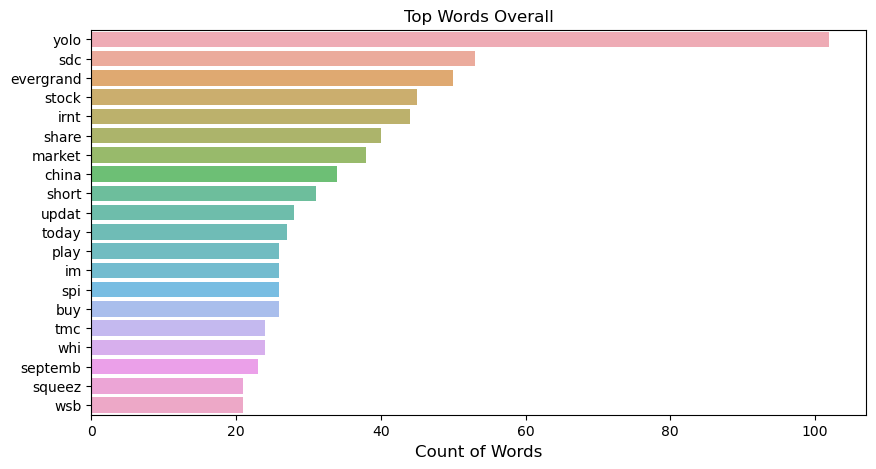

In [9]:
df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [10]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_lg
nlp = en_core_web_lg.load()

In [11]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [12]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

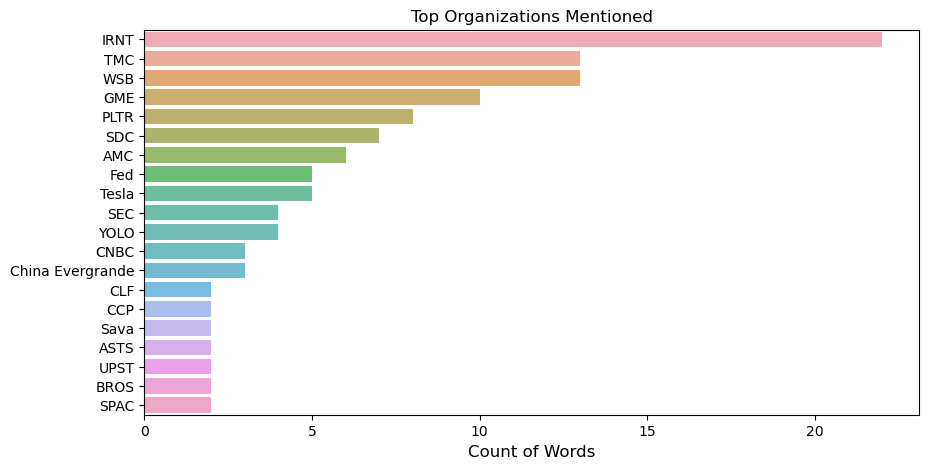

In [13]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [14]:

str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

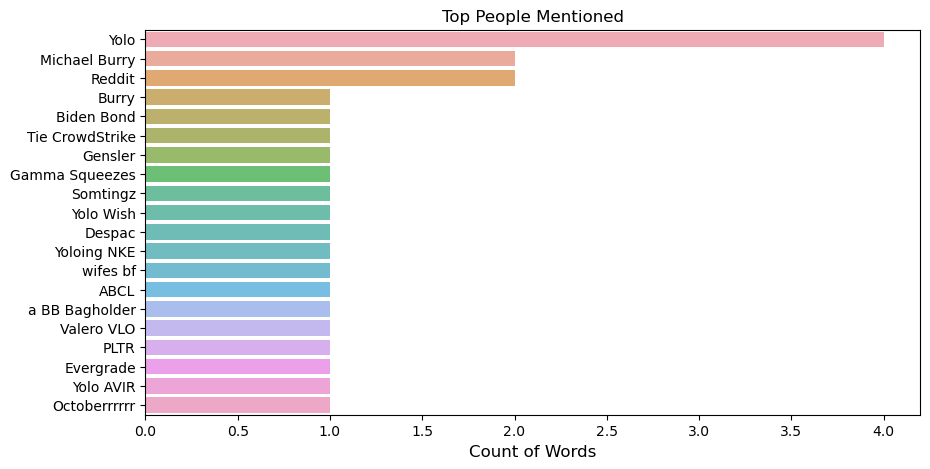

In [15]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()


In [16]:
gains_data



,title,score,id,url,comms_num,created,body
0,"What Are Your Moves Tomorrow, September 23, 2021",209,ptfnuf,https://www.reddit.com/r/wallstreetbets/commen...,8416,1.632341e+09,What are your moves tomorrow? Please keep the ...
1,On Crypto Redux,331,ptet7q,https://www.reddit.com/r/wallstreetbets/commen...,214,1.632338e+09,"Back in April, the idea was floated that it wa..."
2,Which one of you degenerates was this?,2963,ptl9pu,https://i.redd.it/a6l42aabv5p71.png,218,1.632363e+09,
3,CNBC drops another huge buy signal,16281,pt9wtp,https://i.redd.it/k2q3hfm3p2p71.jpg,538,1.632324e+09,
4,"A friend, Never bet against America. $SPY PUTS",945,ptmnsj,https://i.redd.it/zxuw2blha6p71.jpg,293,1.632368e+09,
...,...,...,...,...,...,...,...
795,AMC Trend Angles,21,ppb44o,https://www.reddit.com/r/wallstreetbets/commen...,10,1.631790e+09,Let me start by giving my angle analysis some ...
796,Chinese property giant Evergrande warns again ...,171,pp25vd,https://www.cnn.com/2021/09/14/investing/china...,77,1.631751e+09,
797,How to get small biweekly margin loans from th...,1,ppp6dm,https://www.reddit.com/r/wallstreetbets/commen...,15,1.631837e+09,Obligatory I am not a financial advisor and th...
798,Software Bubble - Historically high valuations...,8,ppgkua,https://www.reddit.com/r/wallstreetbets/commen...,7,1.631809e+09,We know software/newer tech sort of follows th...
